##1. Keras를 이용한 MNIST 분류 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

1) 입력데이터 준비 : 데이터 로드

In [ ]:
nb_classes = 10 ### 클래스 수 (0~9)

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)  ### (60000, 28, 28) : 28x28 이미지가 60000개 들어 있음
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)


11493376/11490434 [==============================] - 2s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


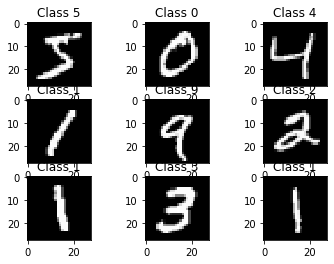

In [ ]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [ ]:
X_train = X_train.reshape(60000, 784) ### (60000, 28, 28) -> (60000, 784) 차원 변경
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print(X_train[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

In [ ]:
X_train /= 255  ### 0~255 값을 0~1로 Normalization?
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

print(X_train[0])

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0

In [ ]:
Y_train = np_utils.to_categorical(y_train, nb_classes)  ### to_categorical : one-hot encoding으로 만들어줌, nb_classes=10이므로 총 10개의 label
Y_test = np_utils.to_categorical(y_test, nb_classes)

print(Y_train.shape)
print(Y_test.shape)

print(Y_train[0]) ### 6

(60000, 10)
(10000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


2) 모델 구성 : 인공신경망 네트워크 구축

In [ ]:
model = Sequential()
model.add(Dense(512, input_shape=(784,), activation='relu'))  ### Input layer 내의 노드 수가 512, 한 노드에서의 값이 784
#model.add(Dropout(0.2))   # 학습중 오버피팅 방지
model.add(Dense(512, activation='relu'))    ### Hidden ayer
#model.add(Dropout(0.2))   # 학습중 오버피팅 방지
model.add(Dense(10, activation='softmax'))  ### Output layer

3) 모델 학습과정 설정

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

4) 모델 학습

In [ ]:
hist = model.fit(X_train, Y_train,
          batch_size=128, epochs=4,
          validation_data=(X_test, Y_test)) ### 학습한 모델을 vailidation data로 평가했을때 성능이 안좋으면 weight 값을 다시 수정해가며 개선함

Epoch 1/4
469/469 [==============================] - 2s 5ms/step - loss: 0.2158 - acc: 0.9352 - val_loss: 0.1017 - val_acc: 0.9690
Epoch 2/4
469/469 [==============================] - 2s 4ms/step - loss: 0.0797 - acc: 0.9753 - val_loss: 0.0842 - val_acc: 0.9738
Epoch 3/4
469/469 [==============================] - 2s 4ms/step - loss: 0.0505 - acc: 0.9838 - val_loss: 0.0735 - val_acc: 0.9775
Epoch 4/4
469/469 [==============================] - 2s 4ms/step - loss: 0.0364 - acc: 0.9883 - val_loss: 0.0572 - val_acc: 0.9847


5) 모델 평가

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=2)

print('Test score:', score) ### accuracy=0.9847, 1이 아닌 이유? => input data에서 모호한 데이터 때문(ex:9처럼 보이는 4)

313/313 - 1s - loss: 0.0572 - acc: 0.9847
Test score: [0.057233262807130814, 0.9847000241279602]


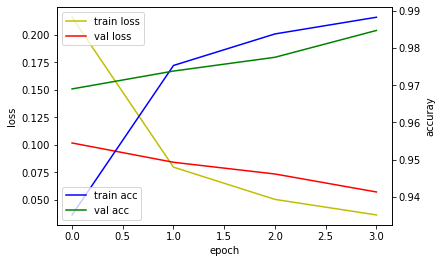

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

6) 모델 예측

In [ ]:
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


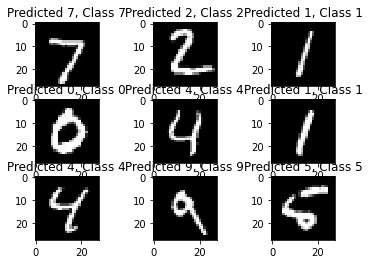

In [ ]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    

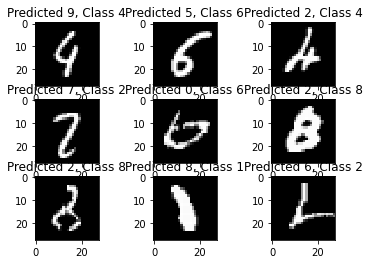

In [ ]:
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))